✅ Setup Selesai. Semua library siap digunakan.

--- Langkah Tambahan: Mengunggah Leksikon InSet ---
Anda perlu mengunduh file 'positive.tsv' dan 'negative.tsv' terlebih dahulu.
Unduh dari: https://github.com/famrashel/idn-sent-lexicon/tree/main/data/lexicon

Silakan unggah DUA file leksikon Anda: `positive.tsv` dan `negative.tsv`.


Saving positive.tsv to positive (4).tsv
Saving negative.tsv to negative (4).tsv
✅ Ditemukan file leksikon positif: 'positive (4).tsv'. Membaca file...
✅ Ditemukan file leksikon negatif: 'negative (4).tsv'. Membaca file...

✅ Leksikon berhasil dimuat. Total kata: 9075

--- Langkah 1: Memuat Data Ulasan ---
Sekarang, silakan unggah file `20191002-reviews.csv` Anda.


Saving 20191002-reviews.csv to 20191002-reviews (2).csv

✅ File '20191002-reviews (2).csv' berhasil dimuat.

--- Langkah 2: Pra-pemrosesan Data ---
Info: Kolom 'reviewContent' telah diubah namanya menjadi 'review'.


/tmp/ipython-input-7-2567062997.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['rating'] = pd.to_numeric(df_selected['rating'], errors='coerce')
/tmp/ipython-input-7-2567062997.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['rating'], inplace=True)
/tmp/ipython-input-7-2567062997.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st



      Deskripsi Hasil Proses Pra-pemrosesan Data Teks
Pra-pemrosesan adalah tahap krusial untuk menyiapkan data mentah
agar dapat diolah dengan baik. Berikut adalah langkah-langkah
yang telah dilakukan pada dataset ini:

1.  Pembersihan Data & Filtering:
    ----------------------------
    a. Seleksi Fitur: Hanya kolom 'rating' dan 'review' yang digunakan.
    b. Penanganan Nilai Hilang (Missing Values):
       - Ulasan (review) yang kosong atau berisi teks 'null' telah dihapus.
       - Rating yang tidak valid (bukan angka) juga telah dibuang.
    c. Filtering Rating Netral: Ulasan dengan rating 3 (netral) dihapus
       untuk menciptakan masalah klasifikasi biner yang lebih jelas antara
       sentimen 'Positif' dan 'Negatif'.

2.  Pembuatan Fitur (Feature Engineering):
    -------------------------------------
    - Sebuah kolom baru bernama 'sentiment_aktual' dibuat dari kolom 'rating'.
    - Aturan: Rating 4 atau 5 diberi label 'Positif', sedangkan rating 1
      atau 2 diberi 

,rating,sentiment_aktual,review,review_cleaned
0,5,Positif,bagus mantap dah sesui pesanan,bagus mantap dah sesui pesanan
1,4,Positif,"Bagus, sesuai foto",bagus sesuai foto
2,5,Positif,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood
3,4,Positif,bagus sesuai,bagus sesuai
4,1,Negatif,bima,bima



--- Langkah 3: Menganalisis Sentimen dengan VADER + Leksikon InSet ---
Info: Leksikon VADER telah diperbarui dengan leksikon yang Anda unggah.

⏳ Menerapkan analisis VADER pada setiap ulasan yang sudah dibersihkan...
✅ Analisis VADER selesai.

Contoh hasil analisis VADER (2 Positif, 2 Netral, 1 Negatif):


,rating,sentiment_aktual,vader_score,sentiment_vader,review
1,4,Positif,0.2500,Positif,"Bagus, sesuai foto"
10,4,Positif,0.4588,Positif,Kualitas ok
2,5,Positif,0.0000,Netral,okkkkk mantaaaaaaapppp ... goood
3,4,Positif,0.0000,Netral,bagus sesuai
0,5,Positif,-0.2500,Negatif,bagus mantap dah sesui pesanan



--- Langkah 4: Laporan Evaluasi Kinerja VADER + InSet ---

Jumlah data yang dievaluasi (setelah membuang hasil Netral): 83297

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.13      0.90      0.23      7867
     Positif       0.97      0.38      0.55     75430

    accuracy                           0.43     83297
   macro avg       0.55      0.64      0.39     83297
weighted avg       0.89      0.43      0.52     83297



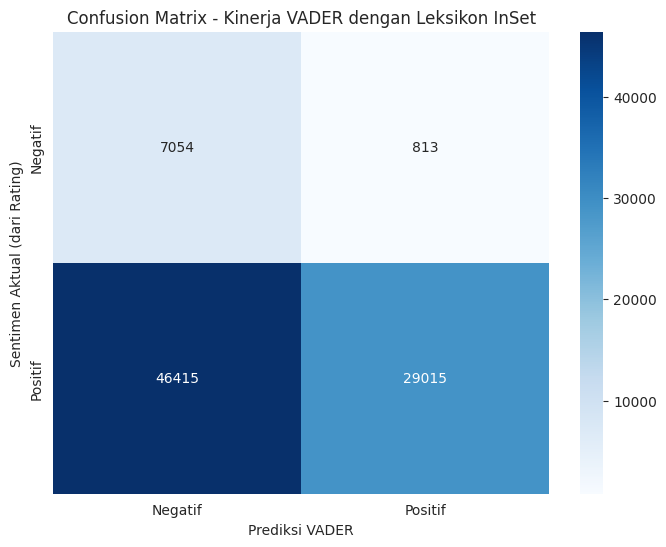

In [7]:
# @title Kode Lengkap: Klasifikasi Sentimen dengan Deskripsi Pra-Pemrosesan Detail
# ===================================================================
# Salin dan jalankan seluruh kode ini di satu sel Google Colab.
# ===================================================================

# -------------------------------------------------------------------
# Langkah 0: Instalasi, Impor, dan Konfigurasi
# -------------------------------------------------------------------
# Instalasi library yang dibutuhkan
!pip install vaderSentiment -q

# Impor library
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from IPython.display import display

# Impor VADER Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix

# Mengatur style visualisasi
%matplotlib inline
sns.set_style('whitegrid')

print("✅ Setup Selesai. Semua library siap digunakan.")


# -------------------------------------------------------------------
# Langkah Tambahan: Unggah Manual dan Muat Leksikon Indonesia
# -------------------------------------------------------------------
print("\n--- Langkah Tambahan: Mengunggah Leksikon InSet ---")
print("Anda perlu mengunduh file 'positive.tsv' dan 'negative.tsv' terlebih dahulu.")
print("Unduh dari: https://github.com/famrashel/idn-sent-lexicon/tree/main/data/lexicon")
print("\nSilakan unggah DUA file leksikon Anda: `positive.tsv` dan `negative.tsv`.")

try:
    uploaded_lexicons = files.upload()
except Exception as e:
    print(f"❌ Terjadi error saat mengunggah file leksikon: {e}")
    uploaded_lexicons = {}

def load_indonesian_lexicon_manual(uploaded_files):
    lexicon = {}
    positive_file_found = False
    negative_file_found = False
    for filename, content in uploaded_files.items():
        if filename.startswith('positive') and filename.endswith('.tsv'):
            print(f"✅ Ditemukan file leksikon positif: '{filename}'. Membaca file...")
            try:
                pos_content = content.decode('utf-8').splitlines()
                for line in pos_content:
                    parts = line.strip().split('\t')
                    if len(parts) == 2:
                        lexicon[parts[0]] = 1.0
                positive_file_found = True
            except Exception as e:
                print(f"❌ Gagal memproses '{filename}': {e}")
        elif filename.startswith('negative') and filename.endswith('.tsv'):
            print(f"✅ Ditemukan file leksikon negatif: '{filename}'. Membaca file...")
            try:
                neg_content = content.decode('utf-8').splitlines()
                for line in neg_content:
                    parts = line.strip().split('\t')
                    if len(parts) == 2:
                        lexicon[parts[0]] = -1.0
                negative_file_found = True
            except Exception as e:
                print(f"❌ Gagal memproses '{filename}': {e}")
    if not positive_file_found:
        print("⚠️ Peringatan: Tidak ada file leksikon positif ('positive*.tsv') yang ditemukan.")
    if not negative_file_found:
        print("⚠️ Peringatan: Tidak ada file leksikon negatif ('negative*.tsv') yang ditemukan.")
    if not lexicon:
        print("\n❌ Leksikon kustom tidak dimuat.")
    else:
        print(f"\n✅ Leksikon berhasil dimuat. Total kata: {len(lexicon)}")
    return lexicon

indonesian_lexicon = load_indonesian_lexicon_manual(uploaded_lexicons)


# -------------------------------------------------------------------
# Langkah 1: Mengunggah dan Memuat Dataset Ulasan
# -------------------------------------------------------------------
print("\n--- Langkah 1: Memuat Data Ulasan ---")
print("Sekarang, silakan unggah file `20191002-reviews.csv` Anda.")
try:
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    df = pd.read_csv(file_name)
    print(f"\n✅ File '{file_name}' berhasil dimuat.")
except Exception as e:
    print(f"\n❌ Terjadi error saat memuat file ulasan: {e}")
    df = None


# -------------------------------------------------------------------
# Langkah 2: Pra-pemrosesan Data
# -------------------------------------------------------------------
if df is not None:
    print("\n--- Langkah 2: Pra-pemrosesan Data ---")

    if 'reviewContent' in df.columns:
        df.rename(columns={'reviewContent': 'review'}, inplace=True)
        print("Info: Kolom 'reviewContent' telah diubah namanya menjadi 'review'.")

    required_cols = ['rating', 'review']
    if all(col in df.columns for col in required_cols):
        df_selected = df[required_cols]
        df_selected['rating'] = pd.to_numeric(df_selected['rating'], errors='coerce')
        df_selected.dropna(subset=['rating'], inplace=True)
        df_selected['rating'] = df_selected['rating'].astype(int)
        df_selected['review'].replace('null', np.nan, inplace=True)
        df_clean = df_selected.dropna(subset=['review']).copy()
        df_clean = df_clean[df_clean['rating'] != 3].reset_index(drop=True)
        df_clean['sentiment_aktual'] = df_clean['rating'].apply(lambda x: 'Positif' if x >= 4 else 'Negatif')

        # --- Langkah 2.1: Pembersihan Teks dan Deskripsi ---
        def clean_text(text):
            text = text.lower()
            text = re.sub(r'\d+', '', text)
            text = re.sub(r'[^\w\s]', '', text)
            text = text.strip()
            text = re.sub('\s+', ' ', text)
            return text
        df_clean['review_cleaned'] = df_clean['review'].apply(clean_text)

        # =================================================================================
        # >>>>>>>> HASIL PROSES PREPROCESSING BERUPA TEKS <<<<<<<<
        # =================================================================================
        print("\n\n============================================================")
        print("      Deskripsi Hasil Proses Pra-pemrosesan Data Teks")
        print("============================================================")
        print("Pra-pemrosesan adalah tahap krusial untuk menyiapkan data mentah")
        print("agar dapat diolah dengan baik. Berikut adalah langkah-langkah")
        print("yang telah dilakukan pada dataset ini:\n")

        print("1.  Pembersihan Data & Filtering:")
        print("    ----------------------------")
        print("    a. Seleksi Fitur: Hanya kolom 'rating' dan 'review' yang digunakan.")
        print("    b. Penanganan Nilai Hilang (Missing Values):")
        print("       - Ulasan (review) yang kosong atau berisi teks 'null' telah dihapus.")
        print("       - Rating yang tidak valid (bukan angka) juga telah dibuang.")
        print("    c. Filtering Rating Netral: Ulasan dengan rating 3 (netral) dihapus")
        print("       untuk menciptakan masalah klasifikasi biner yang lebih jelas antara")
        print("       sentimen 'Positif' dan 'Negatif'.\n")

        print("2.  Pembuatan Fitur (Feature Engineering):")
        print("    -------------------------------------")
        print("    - Sebuah kolom baru bernama 'sentiment_aktual' dibuat dari kolom 'rating'.")
        print("    - Aturan: Rating 4 atau 5 diberi label 'Positif', sedangkan rating 1")
        print("      atau 2 diberi label 'Negatif'. Ini adalah 'Ground Truth' kita.\n")

        print("3.  Pembersihan Teks (Text Cleaning):")
        print("    ---------------------------------")
        print("    Setiap ulasan dalam kolom 'review' dibersihkan dan disimpan di 'review_cleaned':")
        print("    a. Case Folding: Semua huruf diubah menjadi huruf kecil (lowercase).")
        print("    b. Menghapus Angka: Semua digit angka (0-9) dihapus dari teks.")
        print("    c. Menghapus Tanda Baca: Karakter selain huruf dan spasi (misal: .,!?-)")
        print("       dihapus untuk fokus pada kata-kata inti.")
        print("    d. Normalisasi Spasi: Spasi ganda atau lebih diubah menjadi spasi tunggal.\n")

        print("4.  Pendekatan Analisis (Berbasis Leksikon):")
        print("    -----------------------------------------")
        print("    - Metode ini tidak mengubah teks menjadi angka (seperti TF-IDF).")
        print("    - VADER bekerja dengan mencocokkan kata-kata dalam 'review_cleaned' dengan")
        print("      kamus sentimen (leksikon) yang sudah memiliki skor.")
        print("    - Leksikon VADER telah diperbarui dengan leksikon Bahasa Indonesia (InSet)")
        print("      yang Anda unggah untuk meningkatkan akurasi pada teks lokal.")
        print("\nSetelah melalui semua tahap ini, data teks telah siap untuk dianalisis")
        print("menggunakan metode VADER.")
        print("============================================================")
        # =================================================================================

        print("\n✅ Proses pra-pemrosesan selesai.")
        print("\nContoh data yang telah bersih (kolom 'review' vs 'review_cleaned'):")
        display(df_clean[['rating', 'sentiment_aktual', 'review', 'review_cleaned']].head())


        # -------------------------------------------------------------------
        # Langkah 3: Analisis Sentimen Menggunakan VADER dengan Leksikon Indonesia
        # -------------------------------------------------------------------
        print("\n--- Langkah 3: Menganalisis Sentimen dengan VADER + Leksikon InSet ---")

        analyzer = SentimentIntensityAnalyzer()
        if indonesian_lexicon:
             analyzer.lexicon.update(indonesian_lexicon)
             print("Info: Leksikon VADER telah diperbarui dengan leksikon yang Anda unggah.")

        def get_vader_analysis_id(text):
            scores = analyzer.polarity_scores(str(text))
            compound_score = scores['compound']
            if compound_score > 0:
                sentiment = 'Positif'
            elif compound_score < 0:
                sentiment = 'Negatif'
            else:
                sentiment = 'Netral'
            return pd.Series([sentiment, compound_score])

        print("\n⏳ Menerapkan analisis VADER pada setiap ulasan yang sudah dibersihkan...")
        df_clean[['sentiment_vader', 'vader_score']] = df_clean['review_cleaned'].apply(get_vader_analysis_id)
        print("✅ Analisis VADER selesai.")

        print("\nContoh hasil analisis VADER (2 Positif, 2 Netral, 1 Negatif):")
        positif_samples = df_clean[df_clean['sentiment_vader'] == 'Positif'].head(2)
        netral_samples = df_clean[df_clean['sentiment_vader'] == 'Netral'].head(2)
        negatif_samples = df_clean[df_clean['sentiment_vader'] == 'Negatif'].head(1)
        df_display = pd.concat([positif_samples, netral_samples, negatif_samples])

        if df_display.empty:
            print("\nCATATAN: Tidak ada ulasan yang bisa diklasifikasikan. Menampilkan 5 data pertama.")
            display(df_clean[['rating', 'sentiment_aktual', 'vader_score', 'sentiment_vader', 'review']].head())
        else:
            display(df_display[['rating', 'sentiment_aktual', 'vader_score', 'sentiment_vader', 'review']])


        # -------------------------------------------------------------------
        # Langkah 4: Evaluasi Kinerja VADER dengan Leksikon Indonesia
        # -------------------------------------------------------------------
        print("\n--- Langkah 4: Laporan Evaluasi Kinerja VADER + InSet ---")
        df_eval = df_clean[df_clean['sentiment_vader'] != 'Netral']
        if len(df_eval) > 0:
            print(f"\nJumlah data yang dievaluasi (setelah membuang hasil Netral): {len(df_eval)}")
            print("\nClassification Report:")
            labels = sorted(df_eval['sentiment_aktual'].unique())
            print(classification_report(df_eval['sentiment_aktual'], df_eval['sentiment_vader'], labels=labels, zero_division=0))
            cm = confusion_matrix(df_eval['sentiment_aktual'], df_eval['sentiment_vader'], labels=labels)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=labels, yticklabels=labels)
            plt.title('Confusion Matrix - Kinerja VADER dengan Leksikon InSet')
            plt.xlabel('Prediksi VADER')
            plt.ylabel('Sentimen Aktual (dari Rating)')
            plt.show()
        else:
            print("\n❌ Tidak ada data non-netral yang bisa dievaluasi.")
    else:
        print("❌ Gagal melanjutkan. Kolom 'rating' dan/atau 'review' tidak ditemukan di file.")
else:
    print("\nProses tidak dapat dilanjutkan karena file ulasan gagal dimuat.")